This notebook is derived from the EDA.ipynb file in folder 'Data Exploration' with the cleaned data

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import mlflow
import mlflow.sklearn

mlflow.set_tracking_uri("file:../mlruns")

In [28]:
df = pd.read_parquet("../data/cleaned_data.parquet")

In [29]:
df.head(10)

,product_id,product_type,product_name,product_description,product_keywords,product_like_count,sold,reserved,available,in_stock,...,seller_num_followers,seller_pass_rate,product_category_encoded,product_season_encoded,product_condition_encoded,seller_badge_encoded,warehouse_name_encoded,usually_ships_within_encoded,has_cross_border_fees_encoded,product_color_encoded
0,43247626,10777,Wool mini skirt Miu Miu Grey size S Internatio...,Miu Miu – Pleated mini skirt Size: 36 (S) Wai...,Miu Miu Wool Skirts,34.0,True,False,True,False,...,13.0,0.0,192197.0,1,3,0,628442,-1,0,13
1,43247441,4822,Jacket Barbara Bui Navy size 42 FR in Cotton,For selling nice women's suit Barbara Bui size...,Barbara Bui Cotton Jackets,1.0,False,False,True,False,...,8.0,0.0,192197.0,0,2,0,628442,-1,1,17
2,43246517,10751,Wool coat Comme Des Garcons White size S Inter...,Magnificent boiled wool coat. I bought it in t...,Comme Des Garcons Wool Coats,2.0,False,False,True,False,...,62.0,96.0,192197.0,1,2,1,628442,0,1,24
3,43246507,6438,Mini skirt MSGM Black size 38 IT in Polyester,MSGM Skirt Black Printed Raw-Edge & Embroidere...,MSGM Polyester Skirts,0.0,False,False,True,False,...,131.0,96.0,192197.0,0,2,1,128105,0,1,3
4,43246417,10373,Vegan leather trousers LVIR Black size 36 FR i...,LVIR black grained faux leather trousers size ...,LVIR Vegan leather Trousers,1.0,False,False,True,False,...,40.0,89.0,192197.0,0,2,0,76495,1,1,3
5,43246347,6412,Mid,"See By Chloe white dress, size 42 IT (size lik...",See by Chloé Cotton - elasthane Dresses,0.0,False,False,True,False,...,21.0,100.0,192197.0,0,2,0,628442,0,1,24
6,43246327,8643,Silk trousers Just Cavalli Black size 40 IT in...,Amazing flamingo three quarters trousers 100 s...,Just Cavalli Silk Trousers,1.0,False,False,True,False,...,5.0,0.0,192197.0,0,3,0,628442,-1,1,3
7,43246317,8603,Silk mid,Plaid sleeveless below knee silk dress. Worn ...,J.Crew Silk Dresses,0.0,False,False,True,False,...,43.0,82.0,192197.0,0,2,0,628442,2,1,3
8,43246287,9382,Suit jacket Aquascutum Beige size 46 IT in Cot...,Aquascutum classic cut short sleeve jacket and...,Aquascutum Cotton Jackets,0.0,False,False,True,False,...,34.0,96.0,192197.0,0,2,2,628442,0,1,1
9,43246247,10803,Wool suit jacket Dior Grey size 40 FR in Wool,Tweed suit with lace edges. In perfect conditi...,Dior Wool Jackets,2.0,True,False,True,False,...,375.0,95.0,192197.0,1,2,2,628442,0,0,13


In [30]:
#number of unique values in product_material
df.product_material.nunique()

70

In [31]:
# print columns in df as a vertical list
print("\n".join(df.columns))

product_id
product_type
product_name
product_description
product_keywords
product_like_count
sold
reserved
available
in_stock
should_be_gone
brand_id
brand_name
brand_url
product_material
product_color
price_usd
seller_price
seller_earning
buyers_fees
seller_id
seller_username
seller_country
seller_products_sold
seller_num_products_listed
seller_community_rank
seller_num_followers
seller_pass_rate
product_category_encoded
product_season_encoded
product_condition_encoded
seller_badge_encoded
warehouse_name_encoded
usually_ships_within_encoded
has_cross_border_fees_encoded
product_color_encoded


In [32]:
columns_to_drop = ['product_id','product_name','product_description','product_keywords','brand_id','brand_url','product_color','seller_username','has_cross_border_fees_encoded']
df.drop(columns=columns_to_drop, inplace=True)

*Predictive Analysis*

In [33]:
df['margin_rate'] = (df['seller_price'] - df['seller_earning']) / df['seller_price']

In [35]:
df1=df

                         Feature    Importance
8                      price_usd  7.911886e-01
11                   buyers_fees  1.967897e-01
9                   seller_price  9.502128e-03
5                 should_be_gone  6.635642e-04
14          seller_products_sold  3.812327e-04
7               product_material  2.102274e-04
0                   product_type  1.932279e-04
23  usually_ships_within_encoded  1.891301e-04
13                seller_country  1.771898e-04
26                price_per_like  1.703559e-04
15    seller_num_products_listed  1.125066e-04
18              seller_pass_rate  9.236145e-05
6                     brand_name  5.766606e-05
1             product_like_count  5.664886e-05
27         seller_activity_ratio  4.685246e-05
17          seller_num_followers  4.385530e-05
12                     seller_id  4.298634e-05
16         seller_community_rank  3.738717e-05
10                seller_earning  1.988651e-05
25                   margin_rate  1.024816e-05
24         pr

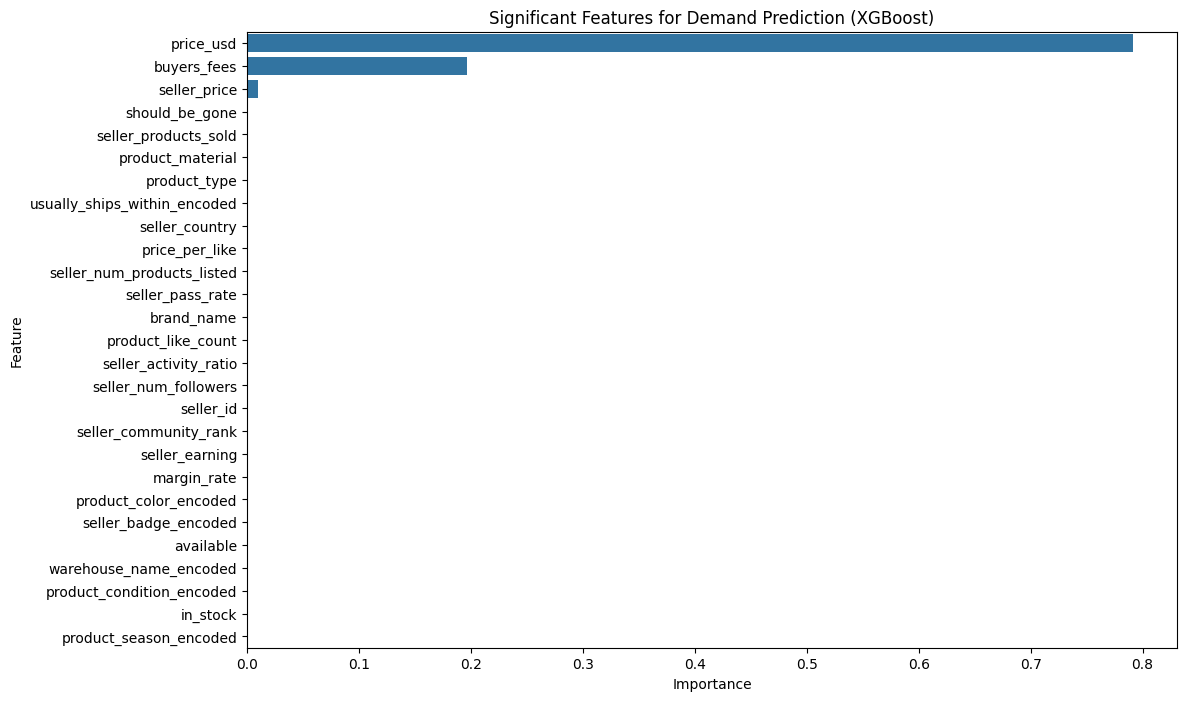

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from xgboost import XGBRegressor

# # Drop unnecessary columns for modeling
# excluded_cols = [ 'product_name', 'product_description', 'product_keywords', 'brand_name', 'brand_url', 'seller_username']

# Step 2: Create Interaction Features
df1['price_per_like'] = df1['price_usd'] / (df1['product_like_count'] + 1)
df1['seller_activity_ratio'] = df1['seller_products_sold'] / (df1['seller_num_products_listed'] + 1)

# Step 3: Feature Selection
X = df1.drop(columns=['sold'])
y = df1['sold']

# Step 4: Split Data for Training and Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Fit XGBoost Model
xgb = XGBRegressor(objective='reg:squarederror', n_estimators=200, learning_rate=0.1, max_depth=6, random_state=42)
xgb.fit(X_train, y_train)

# Step 6: Feature Importance
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': xgb.feature_importances_})
feature_importances = feature_importances[feature_importances['Importance'] > 0]
feature_importances.sort_values(by='Importance', ascending=False, inplace=True)

# Store predictors with importance > 0
predictors = feature_importances['Feature'].tolist()

# Display and plot features with importance > 0
print(feature_importances)
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Significant Features for Demand Prediction (XGBoost)')
plt.show()

In [25]:
# Create Derived Features
df1['price_to_earning_ratio'] = df1['price_usd'] / (df1['seller_earning'] + 1)  # Avoid division by zero
df1['price_per_like'] = df1['price_usd'] / (df1['product_like_count'] + 1)      # Avoid division by zero
df1['seller_activity_ratio'] = df1['seller_products_sold'] / (df1['seller_num_products_listed'] + 1)  # Avoid division by zero

# Check if features are added successfully
print(df1[['price_to_earning_ratio', 'price_per_like', 'seller_activity_ratio']].head())

   price_to_earning_ratio  price_per_like  seller_activity_ratio
0                1.252271        7.797714               0.200000
1                1.188837       63.900000               0.000000
2                1.377823      426.000000               0.828571
3                1.283980      163.900000               0.229091
4                1.415967       59.860000               1.266667


XGBOOST, LGBMBOOST CATBOOST predictive modelling without sampling techniques

2025/04/27 14:20:30 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


XGBClassifier  Val ROC-AUC: 1.0000  Time: 0.00 min
[LightGBM] [Info] Number of positive: 2883, number of negative: 185965
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008682 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4347
[LightGBM] [Info] Number of data points in the train set: 188848, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.015266 -> initscore=-4.166727
[LightGBM] [Info] Start training from score -4.166727
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [War

2025/04/27 14:20:36 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


LGBMClassifier  Val ROC-AUC: 1.0000  Time: 0.01 min


2025/04/27 14:20:42 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


CatBoostClassifier  Val ROC-AUC: 1.0000  Time: 0.02 min


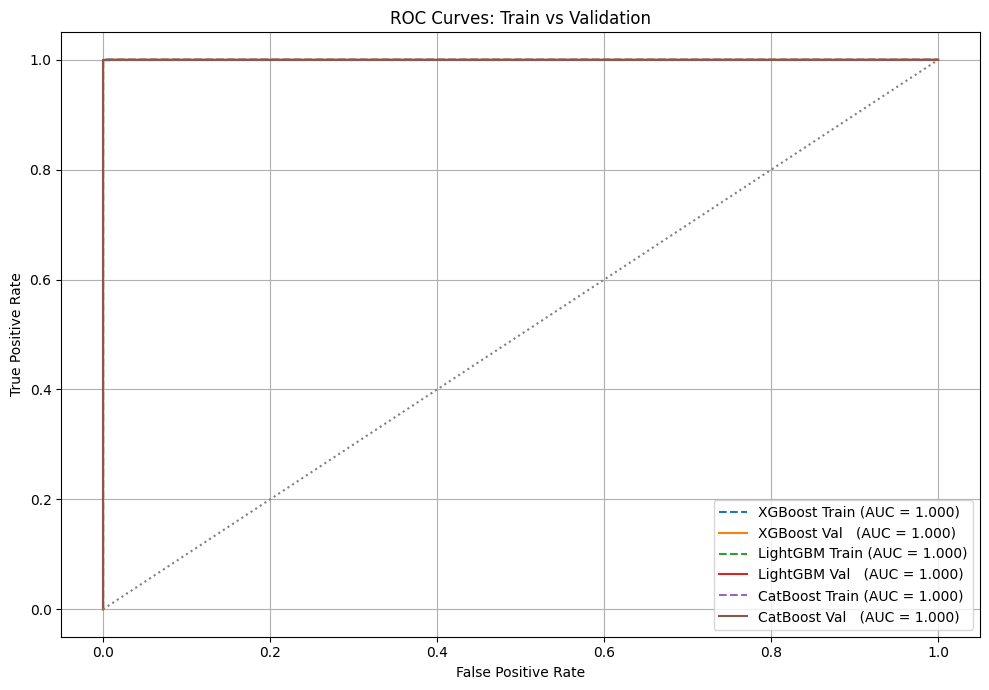

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, learning_curve, StratifiedShuffleSplit
from sklearn.metrics import roc_auc_score, roc_curve, auc
import xgboost as xgb
import lightgbm as lgb
import catboost as cb
import time
import mlflow
import mlflow.sklearn

# —— Setup MLflow Experiment (assumes you set URI above) ——
mlflow.set_experiment("tree-model-comparison")

# —— Feature / Label Prep ——
X = df1.drop(columns=['sold'])
y = df1['sold']

# sample down for speed
X_sample, _, y_sample, _ = train_test_split(
    X, y, train_size=0.3, random_state=42, stratify=y
)

# split sample into train + validation
X_train, X_val, y_train, y_val = train_test_split(
    X_sample, y_sample, test_size=0.3, random_state=42, stratify=y_sample
)

# —— Training + MLflow Logging Function ——
def train_and_evaluate(model, X_tr, y_tr, X_vl, y_vl):
    if mlflow.active_run():
        mlflow.end_run()

    with mlflow.start_run(run_name=model.__class__.__name__):
        t0 = time.time()
        model.fit(X_tr, y_tr)
        # validation predictions for logging
        y_val_pred = model.predict_proba(X_vl)[:, 1]
        val_auc = roc_auc_score(y_vl, y_val_pred)
        elapsed = (time.time() - t0) / 60

        mlflow.log_params(model.get_params())
        mlflow.log_metric("val_roc_auc", val_auc)
        mlflow.log_metric("train_time_minutes", elapsed)
        mlflow.sklearn.log_model(model, "model")

        print(f"{model.__class__.__name__}  Val ROC-AUC: {val_auc:.4f}  Time: {elapsed:.2f} min")
    return model

# —— Initialize Models ——
xgb_model = xgb.XGBClassifier(
    eval_metric='auc', random_state=42,
    n_estimators=30, max_depth=3, tree_method='hist', n_jobs=-1
)
lgb_model = lgb.LGBMClassifier(
    random_state=42, n_estimators=30, max_depth=3, device='cpu'
)
cat_model = cb.CatBoostClassifier(
    verbose=0, random_state=42, iterations=30, depth=3, task_type='CPU'
)

# —— Train on train / validate on val ——
xgb_model = train_and_evaluate(xgb_model, X_train, y_train, X_val, y_val)
lgb_model = train_and_evaluate(lgb_model, X_train, y_train, X_val, y_val)
cat_model = train_and_evaluate(cat_model, X_train, y_train, X_val, y_val)

# —— Plot ROC Curves for Train vs. Validation ——
plt.figure(figsize=(10, 7))
for model, name in [(xgb_model, "XGBoost"), (lgb_model, "LightGBM"), (cat_model, "CatBoost")]:
    # train ROC
    y_train_pred = model.predict_proba(X_train)[:, 1]
    fpr_tr, tpr_tr, _ = roc_curve(y_train, y_train_pred)
    roc_auc_tr = auc(fpr_tr, tpr_tr)
    # val ROC
    y_val_pred = model.predict_proba(X_val)[:, 1]
    fpr_val, tpr_val, _ = roc_curve(y_val, y_val_pred)
    roc_auc_val = auc(fpr_val, tpr_val)

    plt.plot(fpr_tr, tpr_tr, linestyle='--',
             label=f"{name} Train (AUC = {roc_auc_tr:.3f})")
    plt.plot(fpr_val, tpr_val, linestyle='-',
             label=f"{name} Val   (AUC = {roc_auc_val:.3f})")

# diagonal
plt.plot([0, 1], [0, 1], color='gray', linestyle=':')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves: Train vs Validation")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()

# save & (optionally) log as artifact
plt.savefig("roc_train_val.png")
with mlflow.start_run(run_name="roc_curves_plot"):
    mlflow.log_artifact("roc_train_val.png")

plt.show()

XGBOOST, LGBMBOOST CATBOOST predictive modelling WITH SMOTETomek

FAST

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, learning_curve, StratifiedShuffleSplit
from sklearn.metrics import roc_auc_score
import xgboost as xgb
import lightgbm as lgb
import catboost as cb
import time
from imblearn.combine import SMOTETomek

# Filter dataset to the most important features
important_features = [
    'seller_price', 'seller_badge_encoded',
    'should_be_gone', 'seller_pass_rate', 'price_to_earning_ratio', 'seller_products_sold',
    'price_per_like', 'brand_id', 'product_type', 'product_material',
    'product_like_count', 'seller_num_products_listed', 'seller_community_rank',
    'seller_activity_ratio', 'product_color_encoded', 'seller_num_followers', 'margin_rate',
    'available', 'seller_country', 'in_stock', 'product_season_encoded',
    'usually_ships_within_encoded', 'product_condition_encoded', 'warehouse_name_encoded'
]

X = df1[important_features]
y = df1['sold']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Apply SMOTETomek to handle class imbalance
smote_tomek = SMOTETomek(random_state=42)
X_train_resampled, y_train_resampled = smote_tomek.fit_resample(X_train, y_train)

print("Original class distribution:")
print(pd.Series(y_train).value_counts())
print("Resampled class distribution:")
print(pd.Series(y_train_resampled).value_counts())

# Function to train model and evaluate ROC-AUC
def train_and_evaluate(model, X_train, y_train, X_test, y_test):
    start_time = time.time()

    model.fit(X_train, y_train)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test, y_pred_prob)

    elapsed_time = (time.time() - start_time) / 60
    print(f"{model.__class__.__name__} ROC-AUC: {roc_auc:.4f} | Time: {elapsed_time:.2f} min")
    return model

# Initialize optimized models
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='auc', random_state=42,
                              n_estimators=100, max_depth=5, n_jobs=-1)
lgb_model = lgb.LGBMClassifier(random_state=42, n_estimators=100, max_depth=5, n_jobs=-1)
cat_model = cb.CatBoostClassifier(verbose=0, random_state=42, iterations=100, depth=5)

# Train and evaluate with resampled data
xgb_model = train_and_evaluate(xgb_model, X_train_resampled, y_train_resampled, X_test, y_test)
lgb_model = train_and_evaluate(lgb_model, X_train_resampled, y_train_resampled, X_test, y_test)
cat_model = train_and_evaluate(cat_model, X_train_resampled, y_train_resampled, X_test, y_test)

# Function to plot learning curves
def plot_learning_curve(model, X, y, model_name):
    start_time = time.time()

    cv = StratifiedShuffleSplit(n_splits=3, test_size=0.3, random_state=42)
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=cv, scoring='roc_auc', n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 5)  # Reduced for faster execution
    )

    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)

    plt.plot(train_sizes, train_mean, label=f"{model_name} Train")
    plt.plot(train_sizes, test_mean, label=f"{model_name} Test")

    elapsed_time = (time.time() - start_time) / 60
    print(f"{model_name} Learning Curve completed in {elapsed_time:.2f} min")

plt.figure(figsize=(12, 8))
plot_learning_curve(xgb_model, X_train_resampled, y_train_resampled, "XGBoost")
plot_learning_curve(lgb_model, X_train_resampled, y_train_resampled, "LightGBM")
plot_learning_curve(cat_model, X_train_resampled, y_train_resampled, "CatBoost")

plt.title("Learning Curves Comparison (with SMOTETomek)")
plt.xlabel("Training Size")
plt.ylabel("ROC-AUC Score")
plt.legend()
plt.grid()
plt.show()

training without seller_price to see if accuracy can go down to prevent overfitting

Original class distribution:
sold
False    619887
True       9609
Name: count, dtype: int64
Resampled class distribution:
sold
False    617329
True     617329
Name: count, dtype: int64


/Users/chloe/Library/Caches/pypoetry/virtualenvs/ml-workflow-E6RnwYIN-py3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:11:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier ROC-AUC: 0.8459 | Time: 0.03 min
[LightGBM] [Info] Number of positive: 617329, number of negative: 617329
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021119 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3521
[LightGBM] [Info] Number of data points in the train set: 1234658, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

/Users/chloe/Library/Caches/pypoetry/virtualenvs/ml-workflow-E6RnwYIN-py3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:11:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/chloe/Library/Caches/pypoetry/virtualenvs/ml-workflow-E6RnwYIN-py3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:11:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/chloe/Library/Caches/pypoetry/virtualenvs/ml-workflow-E6RnwYIN-py3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:11:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/chloe/Library/Caches/pypoetry/virtualenvs/ml-wor

XGBoost Learning Curve completed in 0.31 min
LightGBM Learning Curve completed in 0.33 min
CatBoost Learning Curve completed in 0.67 min


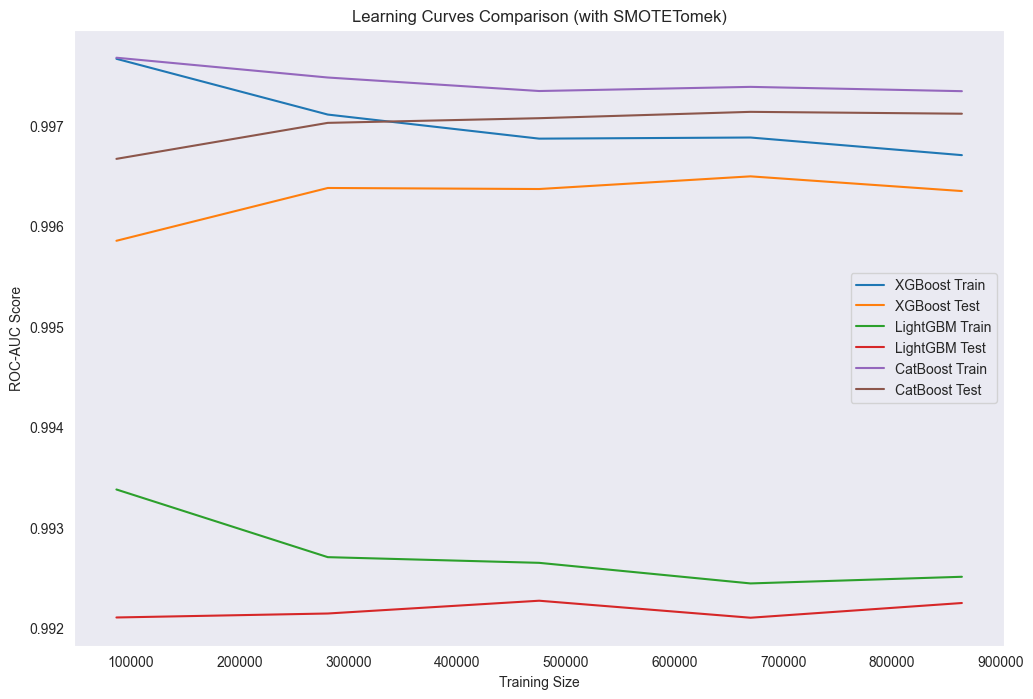

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, learning_curve, StratifiedShuffleSplit
from sklearn.metrics import roc_auc_score
import xgboost as xgb
import lightgbm as lgb
import catboost as cb
import time
from imblearn.combine import SMOTETomek

# Filter dataset to the most important features
important_features = [
    'seller_badge_encoded',
    'should_be_gone', 'seller_pass_rate', 'price_to_earning_ratio', 'seller_products_sold',
    'price_per_like', 'brand_id', 'product_type', 'product_material',
    'product_like_count', 'seller_num_products_listed', 'seller_community_rank',
    'seller_activity_ratio', 'product_color_encoded', 'seller_num_followers', 'margin_rate',
    'available', 'seller_country', 'in_stock', 'product_season_encoded',
    'usually_ships_within_encoded', 'product_condition_encoded', 'warehouse_name_encoded'
]

X = df1[important_features]
y = df1['sold']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Apply SMOTETomek to handle class imbalance
smote_tomek = SMOTETomek(random_state=42)
X_train_resampled, y_train_resampled = smote_tomek.fit_resample(X_train, y_train)

print("Original class distribution:")
print(pd.Series(y_train).value_counts())
print("Resampled class distribution:")
print(pd.Series(y_train_resampled).value_counts())

# Function to train model and evaluate ROC-AUC
def train_and_evaluate(model, X_train, y_train, X_test, y_test):
    start_time = time.time()

    model.fit(X_train, y_train)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test, y_pred_prob)

    elapsed_time = (time.time() - start_time) / 60
    print(f"{model.__class__.__name__} ROC-AUC: {roc_auc:.4f} | Time: {elapsed_time:.2f} min")
    return model

# Initialize optimized models
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='auc', random_state=42,
                              n_estimators=100, max_depth=5, n_jobs=-1)
lgb_model = lgb.LGBMClassifier(random_state=42, n_estimators=100, max_depth=5, n_jobs=-1)
cat_model = cb.CatBoostClassifier(verbose=0, random_state=42, iterations=100, depth=5)

# Train and evaluate with resampled data
xgb_model = train_and_evaluate(xgb_model, X_train_resampled, y_train_resampled, X_test, y_test)
lgb_model = train_and_evaluate(lgb_model, X_train_resampled, y_train_resampled, X_test, y_test)
cat_model = train_and_evaluate(cat_model, X_train_resampled, y_train_resampled, X_test, y_test)

# Function to plot learning curves
def plot_learning_curve(model, X, y, model_name):
    start_time = time.time()

    cv = StratifiedShuffleSplit(n_splits=3, test_size=0.3, random_state=42)
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=cv, scoring='roc_auc', n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 5)  # Reduced for faster execution
    )

    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)

    plt.plot(train_sizes, train_mean, label=f"{model_name} Train")
    plt.plot(train_sizes, test_mean, label=f"{model_name} Test")

    elapsed_time = (time.time() - start_time) / 60
    print(f"{model_name} Learning Curve completed in {elapsed_time:.2f} min")

plt.figure(figsize=(12, 8))
plot_learning_curve(xgb_model, X_train_resampled, y_train_resampled, "XGBoost")
plot_learning_curve(lgb_model, X_train_resampled, y_train_resampled, "LightGBM")
plot_learning_curve(cat_model, X_train_resampled, y_train_resampled, "CatBoost")

plt.title("Learning Curves Comparison (with SMOTETomek)")
plt.xlabel("Training Size")
plt.ylabel("ROC-AUC Score")
plt.legend()
plt.grid()
plt.show()


The difference is still low, still exhibiting very high accuracy of almost 0.998 in learning curve

In [20]:
print(X_train.corrwith(y_train))


seller_badge_encoded            0.015890
should_be_gone                  0.068662
seller_pass_rate                0.008802
price_to_earning_ratio          0.005699
seller_products_sold            0.010209
price_per_like                 -0.028715
brand_id                       -0.011951
product_type                   -0.009378
product_material               -0.017942
product_like_count              0.082426
seller_num_products_listed     -0.024294
seller_community_rank           0.003337
seller_activity_ratio           0.071856
product_color_encoded           0.000770
seller_num_followers            0.019341
margin_rate                    -0.001937
available                       0.012922
seller_country                 -0.019592
in_stock                        0.016439
product_season_encoded          0.006414
usually_ships_within_encoded    0.009173
product_condition_encoded       0.017090
warehouse_name_encoded          0.024689
dtype: float64
